In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('GS1.xlsx')
df

,Year,Question
0,2023,Explain the role of geographical factors towar...
1,2023,What was the difference between Mahatma Gandhi...
2,2023,Bring out the socio-economic effects of the in...
3,2023,Discuss the consequences of climate change on ...
4,2023,Why is the world today confronted with a crisi...
...,...,...
230,2013,There is no formation of deltas by rivers on t...
231,2013,Do you agree that there is a growing trend of ...
232,2013,Analyze the factors for the highly decentraliz...
233,2013,"With growing scarcity of fossil fuels, the ato..."


In [3]:
text = df.Question[0]
print(text)

Explain the role of geographical factors towards the development of Ancient India.


In [4]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import re
import string

def preprocess_text(text):
    """
    Preprocesses the given text by removing punctuation, extra spaces, converting to lowercase,
    and filtering out stopwords.
    
    Args:
        text (str): The text to be preprocessed.
    
    Returns:
        str: The preprocessed text.
    """
    # Load English stopwords
    text = text.lower()
    stop_words = set(stopwords.words('english'))

    # Add question words to the set of stopwords
    question_words = {'explain', 'what', 'when', 'where', 'who', 'whom', 'which', 'why', 'how', 
                        'comment', 'discuss', 'you', 'india', 'your', 'he', 's', 'his', 'government', 
                        'public', 'these', 'following', 'her', 'example', 'indian', 'ethical', 
                        'examine', 'state', 'critically', 'company', 'context', 'national', 'security', 
                        'country', 'measures', 'act', 'him', 'role', 'she', 'management', 'being', 
                        'issues', 'taken', 'suggest', 'social', 'options', 'civil', 'system', 'people', 
                        'had', 'case', 'situation', 'human', 'recent', 'give', 'life', 'help', 'does', 
                        'various'}
    stop_words.update(question_words)

    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove extra spaces
    text = re.sub(r' +', ' ', text)

    # Tokenize the text to filter out stopwords
    tokens = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

text = df.Question[0]
filtered_text = preprocess_text(text)
print(filtered_text)

geographical factor towards development ancient


In [6]:
df['processed_questions'] = df['Question'].apply(preprocess_text)

In [7]:
df.head(3)

,Year,Question,processed_questions
0,2023,Explain the role of geographical factors towar...,geographical factor towards development ancient
1,2023,What was the difference between Mahatma Gandhi...,difference mahatma gandhi rabindranath tagore ...
2,2023,Bring out the socio-economic effects of the in...,bring socioeconomic effect introduction railwa...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [9]:
questions = df['processed_questions'].values.astype('U')

In [10]:
#TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(questions)

In [11]:
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1157 stored elements and shape (235, 318)>

In [12]:
#Topic Modeling with NMF
nmf_model = NMF(n_components=10,random_state=1)
nmf_topic = nmf_model.fit_transform(tfidf)


In [13]:
# Displaying Topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print('\n')

Topic #0:
water resource effective land differ region natural scarcity urban impact


Topic #1:
woman movement freedom struggle phase gender gandhian base growth analyze


Topic #2:
identity caste impact global work local communalism economy debate emergence


Topic #3:
process problem example urbanization ass state administrative significant weather justify


Topic #4:
century mideighteenth british colonial policy reason independence economic way uprising


Topic #5:
world crisis area resource country war effect modern food industry


Topic #6:
development economic factor major regional revolution city strategy ancient industry


Topic #7:
society cultural elaborate answer change feature affect region religion diversity


Topic #8:
significance mahatma gandhi time present art architecture approach difference evolution


Topic #9:
cause formation western ghat landslide island state bring himalaya poverty




In [14]:
# keywords manually by person - 20-25 words 
# 

In [15]:
from bertopic import BERTopic

e:\repos\SURP-2024\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
from bertopic.representation import KeyBERTInspired
representation = KeyBERTInspired()
topic_model = BERTopic(min_topic_size=4,nr_topics='auto',calculate_probabilities=True,representation_model=representation)

In [17]:
topics,prob = topic_model.fit_transform(questions)

In [18]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,19,-1_hindu_delhi_kolkata_krishnadeva,"[hindu, delhi, kolkata, krishnadeva, mumbai, h...",[would difficult constituent assembly complete...
1,0,108,0_climate_ocean_monsoon_sea,"[climate, ocean, monsoon, sea, flood, glacier,...",[briefly mention alignment major mountain rang...
2,1,31,1_independence_colonial_industrialization_revolt,"[independence, colonial, industrialization, re...",[political administrative reorganization state...
3,2,15,2_sculpture_art_aesthetic_architecture,"[sculpture, art, aesthetic, architecture, monu...",[significance lion bull figure mythology art a...
4,3,14,3_feminization_woman_patriarchy_gender,"[feminization, woman, patriarchy, gender, empo...",[woman question arose modern part 19th century...
5,4,14,4_diversity_communalism_cultural_globalisation,"[diversity, communalism, cultural, globalisati...",[describe four cultural element diversity rate...
6,5,12,5_gandhi_gandhian_mahatma_rabindranath,"[gandhi, gandhian, mahatma, rabindranath, nati...",[mahatma gandhi dr b r ambedkar despite diverg...
7,6,9,6_secularism_religiousnessreligiosity_religion...,"[secularism, religiousnessreligiosity, religio...",[tolerance assimilation pluralism key element ...
8,7,7,7_tribals_tribal_tribe_tribessts,"[tribals, tribal, tribe, tribessts, discrimina...",[colonial rule affect tribals tribal response ...
9,8,6,8_socialization_education_achieve_objective,"[socialization, education, achieve, objective,...",[main objective population education point ach...


In [19]:
no_topic_questions =[questions[i] for i in range(len(topics)) if topics[i] == -1]
print(len(no_topic_questions))
if len(no_topic_questions) != 0:
    new_topic, new_prob = topic_model.transform(no_topic_questions)

# new_topic_list = new_topic.tolist()
new_prob_list = new_prob.tolist()
for i,topic in enumerate(topics):
    if topic == -1:
        topics[i] = new_topic.pop(0)
        prob[i] = new_prob_list.pop(0)


19


In [20]:
topics[:5]

[-1, 5, 0, 0, 0]

In [21]:
topic_str = topic_model.get_topic_info(0)['Name'].iloc[0]
topic_str.split('_')
' '.join(topic_str.split('_')[1:])


'climate ocean monsoon sea'

In [22]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,19,-1_hindu_delhi_kolkata_krishnadeva,"[hindu, delhi, kolkata, krishnadeva, mumbai, h...",[would difficult constituent assembly complete...
1,0,108,0_climate_ocean_monsoon_sea,"[climate, ocean, monsoon, sea, flood, glacier,...",[briefly mention alignment major mountain rang...
2,1,31,1_independence_colonial_industrialization_revolt,"[independence, colonial, industrialization, re...",[political administrative reorganization state...
3,2,15,2_sculpture_art_aesthetic_architecture,"[sculpture, art, aesthetic, architecture, monu...",[significance lion bull figure mythology art a...
4,3,14,3_feminization_woman_patriarchy_gender,"[feminization, woman, patriarchy, gender, empo...",[woman question arose modern part 19th century...
5,4,14,4_diversity_communalism_cultural_globalisation,"[diversity, communalism, cultural, globalisati...",[describe four cultural element diversity rate...
6,5,12,5_gandhi_gandhian_mahatma_rabindranath,"[gandhi, gandhian, mahatma, rabindranath, nati...",[mahatma gandhi dr b r ambedkar despite diverg...
7,6,9,6_secularism_religiousnessreligiosity_religion...,"[secularism, religiousnessreligiosity, religio...",[tolerance assimilation pluralism key element ...
8,7,7,7_tribals_tribal_tribe_tribessts,"[tribals, tribal, tribe, tribessts, discrimina...",[colonial rule affect tribals tribal response ...
9,8,6,8_socialization_education_achieve_objective,"[socialization, education, achieve, objective,...",[main objective population education point ach...


In [23]:
topic_model.visualize_topics()

In [24]:
topic_model.visualize_documents(df['Question'])

In [25]:
print(topics)

[-1, 5, 0, 0, 0, 0, 0, 6, 3, 8, 6, 1, 7, 0, -1, 0, 0, 0, 7, -1, 2, 1, 1, 0, 0, 0, 0, 8, 0, 7, 1, 2, 2, 0, 0, 0, 0, 6, 6, 0, -1, -1, 1, 0, 0, 0, 0, 4, 4, 3, 1, 5, 1, 0, 0, 0, 0, 8, 0, 4, 2, 2, 1, 0, 0, 0, 0, -1, 0, 4, 2, 2, 1, 0, -1, 0, 0, 4, 6, 8, 2, 1, 1, 0, 0, 0, 0, 4, 3, 6, 5, 1, 1, 0, 0, 0, 0, 4, 3, 7, 2, -1, 5, 0, 0, 0, 0, 7, 0, 6, 5, 0, -1, 0, 8, 0, 0, 3, 4, 4, 2, 1, 1, 1, 0, 0, 0, 0, 4, 7, -1, 1, 8, 0, 0, 0, 0, 3, 6, 0, 2, -1, 1, 3, 5, 4, 1, 4, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 5, 5, -1, 1, 1, 4, 0, 3, 0, 3, -1, 0, -1, 0, 0, 0, 0, 0, 0, 2, -1, -1, -1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 6, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 1, -1, 5, 5, 5, 1, 5, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
df['Topic_Number'] = topics

In [27]:
df.sample(5)

,Year,Question,processed_questions,Topic_Number
217,2013,“Africa was chopped into states artificially c...,africa chopped state artificially created acci...,0
156,2016,Major cities of India are becoming more vulner...,major city becoming vulnerable flood condition,0
190,2014,How does patriarchy impact the position of a m...,patriarchy impact position middle class workin...,3
45,2021,what are the environmental implications of the...,environmental implication reclamation water bo...,0
56,2021,What are the main socio-economic implications ...,main socioeconomic implication arising develop...,0


In [28]:

df['Topic'] = df['Topic_Number'].apply(lambda x: " ".join(topic_model.get_topic_info(topic=x)['Name'].iloc[0].split('_')[1:]))

# Display the first few rows of the DataFrame
df.head()

,Year,Question,processed_questions,Topic_Number,Topic
0,2023,Explain the role of geographical factors towar...,geographical factor towards development ancient,-1,hindu delhi kolkata krishnadeva
1,2023,What was the difference between Mahatma Gandhi...,difference mahatma gandhi rabindranath tagore ...,5,gandhi gandhian mahatma rabindranath
2,2023,Bring out the socio-economic effects of the in...,bring socioeconomic effect introduction railwa...,0,climate ocean monsoon sea
3,2023,Discuss the consequences of climate change on ...,consequence climate change food tropical country,0,climate ocean monsoon sea
4,2023,Why is the world today confronted with a crisi...,world today confronted crisis availability acc...,0,climate ocean monsoon sea


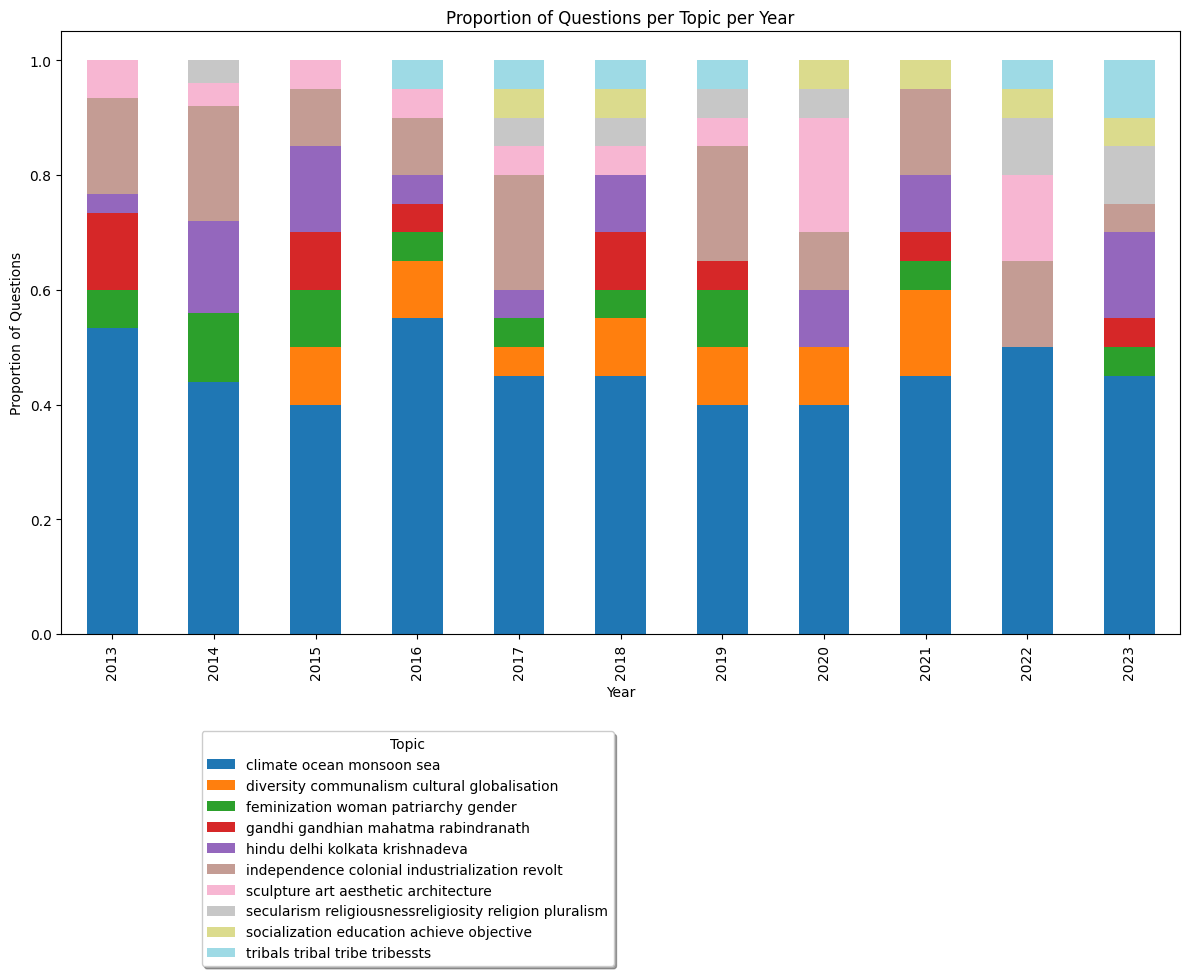

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df is your DataFrame and it now includes a 'Topic' column after categorization

# Step 2: Count questions per topic per year
topic_year_counts = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()